# CPSC 330 - Applied Machine Learning 

## Homework 6: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, November 15, 2021 at 11:59pm**

## Table of contents

- [Submission instructions](#si)
- [Understanding the problem](#1)
- [Data splitting](#2)
- [EDA](#3)
- (Optional) [Feature engineering](#4)
- [Preprocessing and transformations](#5)
- [Baseline model](#6)
- [Linear models](#7)
- [Different classifiers](#8)
- (Optional) [Feature selection](#9)
- [Hyperparameter optimization](#10)
- [Interpretation and feature importances](#11)
- [Results on the test set](#12)
- (Optional) [Explaining predictions](#13)
- [Summary of the results](#14)

## Imports 

In [1]:
import os

%matplotlib inline
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    plot_confusion_matrix,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC

<br><br>

## Instructions 
<hr>
rubric={points:2}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). 

**You may work on this homework in a group and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 3. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).

<br><br>

## Introduction <a name="in"></a>
<hr>

At this point we are at the end of supervised machine learning part of the course. So in this homework, you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips

1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 
4. If you are having trouble running models on your laptop because of the size of the dataset, you can create your train/test split in such a way that you have less data in the train split. If you end up doing this, please write a note to the grader in the submission explaining why you are doing it.  

#### Assessment

We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.

#### A final note

Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (2-8 hours???) is a good guideline for a typical submission. Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

## 1. Understanding the problem <a name="1"></a>
<hr>
rubric={points:4}

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

In [2]:
cc_df = pd.read_csv("UCI_Credit_Card.csv")
cc_df.shape


(30000, 25)

**As I look through the features of the data set, ID feature could be unhelpful in predicting the outcome. Data seems complete as there are no unknown values so no imputation will be needed. It would be interesting to see how big of a factor marriage, age and sex is in determining whether someone will default their payment.**

<br><br>

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train and test portions. 

In [3]:
X = cc_df.drop(columns = ["default.payment.next.month", "ID"])
y = cc_df["default.payment.next.month"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=123
)

<br><br>

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

In [4]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**The LIMIT_BAL the max 1000000.00 and the max of PAY_AMT2 is 1.684259e+06  which suggests that it is helpful to scale.**

In [5]:
pay = cc_df[cc_df['default.payment.next.month'] == 1]

nopay = cc_df[cc_df['default.payment.next.month'] == 0]

print("pay: " + str(pay.shape))
print("nopay: " + str(nopay.shape))

pay: (6636, 25)
nopay: (23364, 25)


**From the information given above, we can see that there is a class imbalance of the target class of 23364 who did not default and 6636 of who defaulted.**

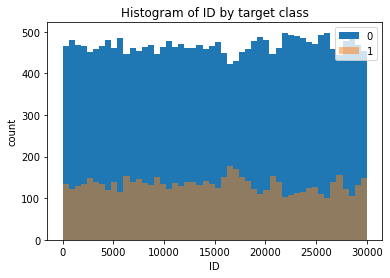

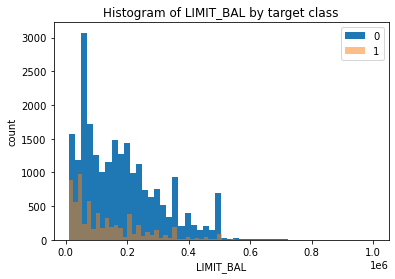

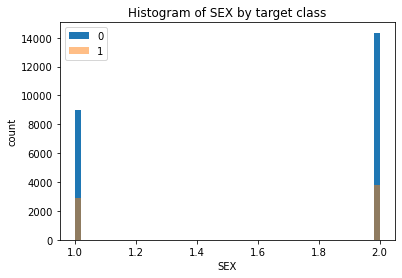

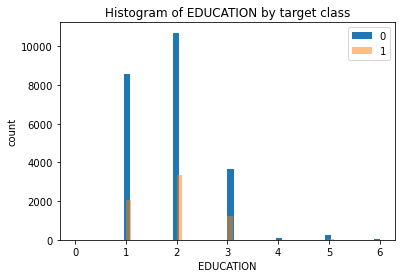

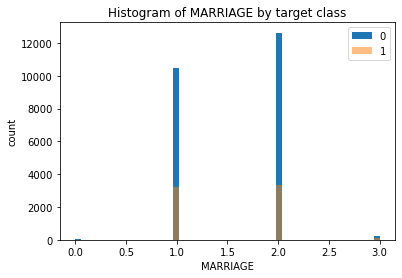

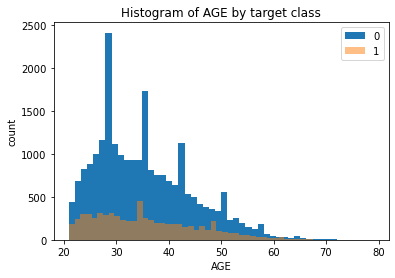

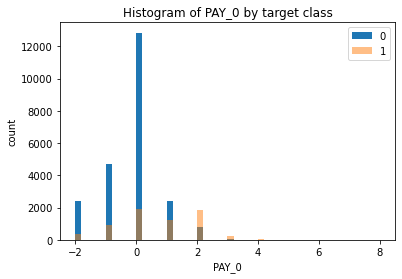

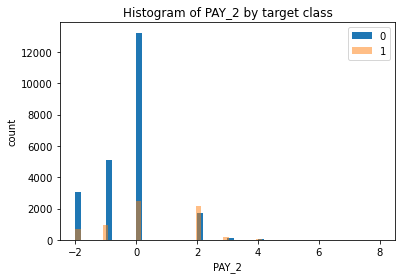

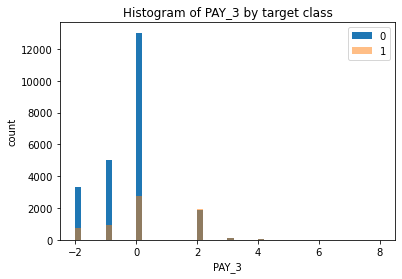

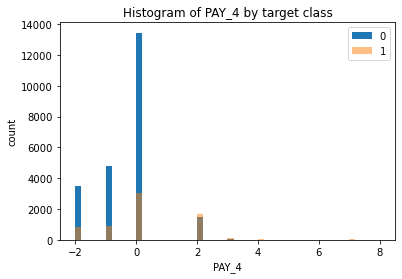

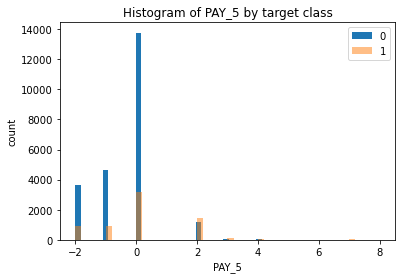

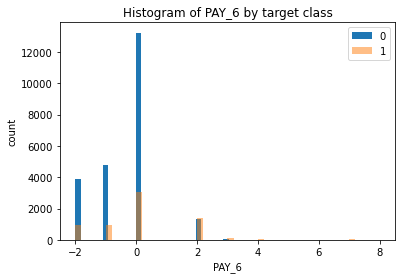

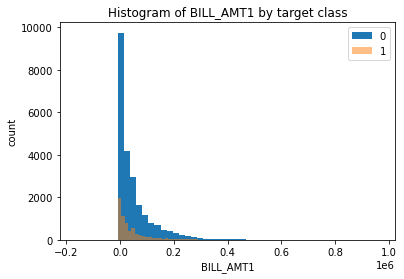

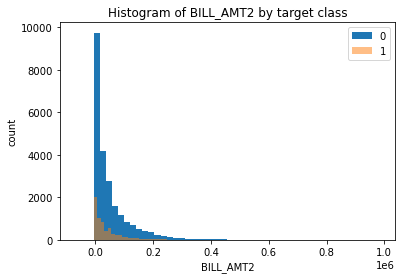

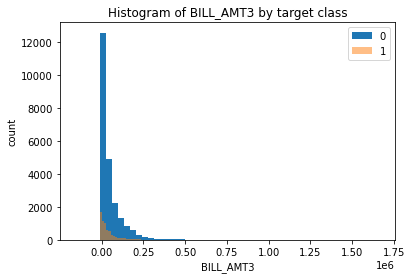

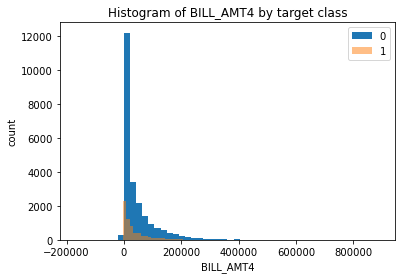

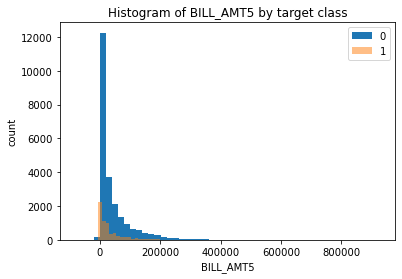

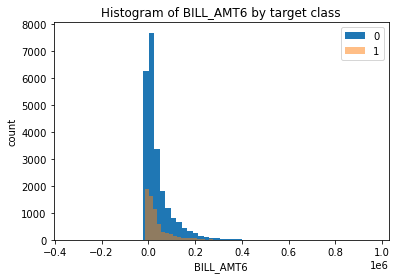

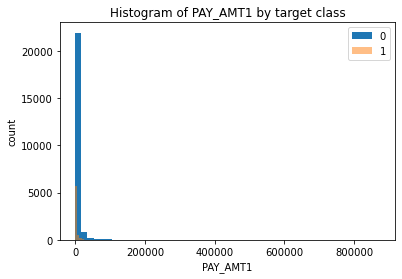

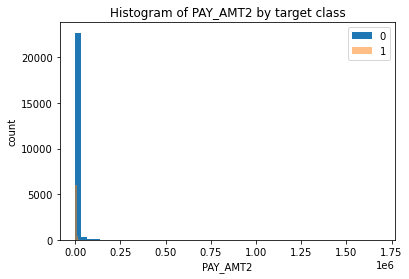

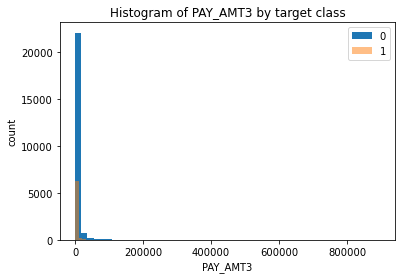

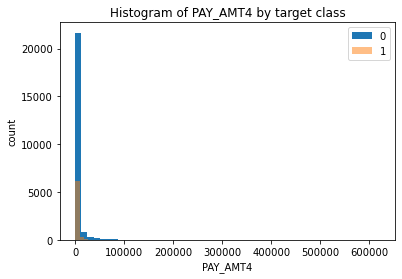

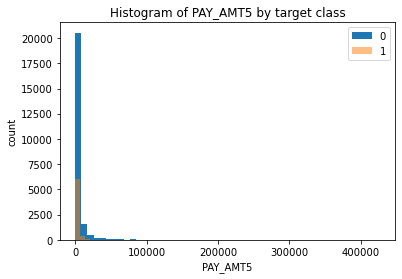

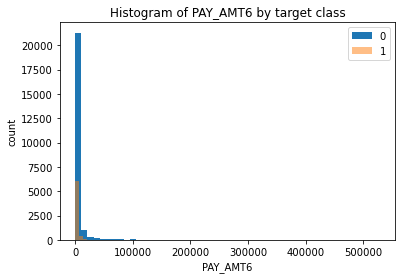

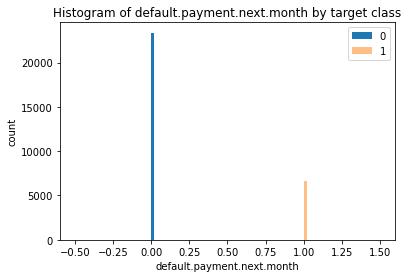

In [6]:
features = []

for col in cc_df.columns:
    features.append(col)

figures = dict()

for feature in features:
    plt.hist(nopay[feature], alpha=1, bins=50, label="0")
    plt.hist(pay[feature], alpha=0.5, bins=50, label="1")
    plt.legend(loc="best")

    plt.xlabel(feature)
    plt.ylabel("count")
    plt.title(f"Histogram of {feature} by target class")
    plt.show()

**LIMIT_BAL and AGE seems like a relevant feature for the given prediction task.**

<AxesSubplot:xlabel='AGE', ylabel='PAY_AMT1'>

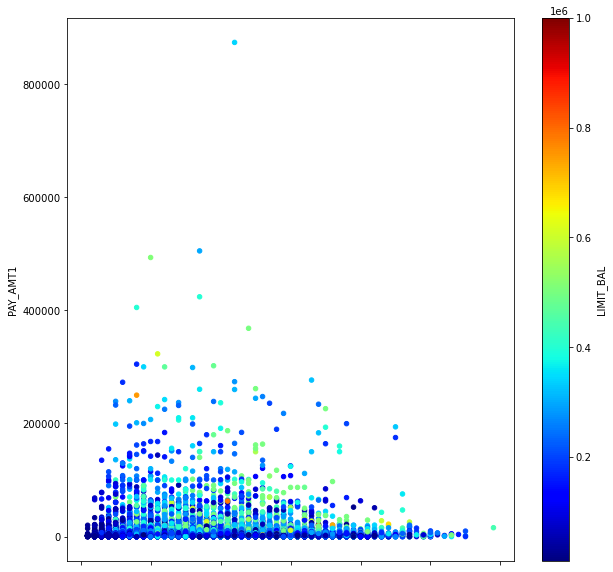

In [7]:
cc_df.plot(
    kind='scatter',
    x='AGE',
    y='PAY_AMT1',
    c='LIMIT_BAL',
    cmap=plt.get_cmap("jet"),
    figsize=(10,10),
    colorbar=True
)

**This might suggest that middle-age people (30-50) have higher LIMIT_BAL which in turn will have higher payments.**

**As explained above, the ID feature will be dropped as it should have no impact on whether someone will default their payment.**


## METRICS.
**It is more detrimental to the credit card company to not be able to detect when people are going to default; that is when we are interested in false negatives. Due to class imbalances, we will be using F1, precision and recall scores instead of accuracy. Not being able to detect people who will default increases the opportunity cost of the company, thus we should be trying to optimize recall scores instead of precision scores.**


<br><br>

## (Optional) 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<br><br>

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 10659 to 19966
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LIMIT_BAL  27000 non-null  float64
 1   SEX        27000 non-null  int64  
 2   EDUCATION  27000 non-null  int64  
 3   MARRIAGE   27000 non-null  int64  
 4   AGE        27000 non-null  int64  
 5   PAY_0      27000 non-null  int64  
 6   PAY_2      27000 non-null  int64  
 7   PAY_3      27000 non-null  int64  
 8   PAY_4      27000 non-null  int64  
 9   PAY_5      27000 non-null  int64  
 10  PAY_6      27000 non-null  int64  
 11  BILL_AMT1  27000 non-null  float64
 12  BILL_AMT2  27000 non-null  float64
 13  BILL_AMT3  27000 non-null  float64
 14  BILL_AMT4  27000 non-null  float64
 15  BILL_AMT5  27000 non-null  float64
 16  BILL_AMT6  27000 non-null  float64
 17  PAY_AMT1   27000 non-null  float64
 18  PAY_AMT2   27000 non-null  float64
 19  PAY_AMT3   27000 non-null  float64
 20  PA

In [9]:

categorical_feats = [
    'PAY_0',
    'PAY_2',
    'PAY_3',
    'PAY_4',
    'PAY_5',
    'PAY_6',
    'MARRIAGE',
    'EDUCATION'
]

numeric_feats = [
    'LIMIT_BAL',
    'AGE',
    'BILL_AMT1',
    'BILL_AMT2',
    'BILL_AMT3',
    'BILL_AMT4',
    'BILL_AMT5',
    'BILL_AMT6',
    'PAY_AMT1',
    'PAY_AMT2',
    'PAY_AMT3',
    'PAY_AMT4',
    'PAY_AMT5',
    'PAY_AMT6',
]
    
binary_feats = [
    'SEX'
]



In [10]:
numeric_transformer = make_pipeline(StandardScaler())


categorical_transformer = make_pipeline(
    OneHotEncoder(handle_unknown="ignore", sparse=False),
)

binary_transformer = make_pipeline(
    OneHotEncoder(drop="if_binary", dtype=int),
)


preprocessor = make_column_transformer(
    (StandardScaler(), numeric_feats), 
    (OneHotEncoder(drop="if_binary", dtype=int), binary_feats),    
    (OneHotEncoder(handle_unknown="ignore", sparse=False), categorical_feats),
)


In [11]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
                                  'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5',
                                  'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
                                  'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
                                  'PAY_AMT6']),
                                ('onehotencoder-1',
                                 OneHotEncoder(drop='if_binary',
                                               dtype=<class 'int'>),
                                 ['SEX']),
                                ('onehotencoder-2',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse=False),
                                 ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
                                  'PAY_6', 'MARRIAGE', 'EDUCATION'])])

<br><br>

In [12]:
transformed = preprocessor.fit_transform(X_train, y_train)


## 6. Baseline model <a name="6"></a>
<hr>

rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

In [13]:
# from hw3

def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [14]:
scoring = [
    "f1",
    "recall",
    "accuracy"
]

In [15]:
results_dict = {}

dummy = DummyClassifier(strategy="prior")
pipe = make_pipeline(preprocessor, dummy)
results_dict["dummy"] = mean_std_cross_val_scores(
    pipe, X_train, y_train, cv=5, return_train_score=True, scoring = scoring
)
pd.DataFrame(results_dict)

,dummy
fit_time,0.025 (+/- 0.001)
score_time,0.009 (+/- 0.000)
test_f1,0.000 (+/- 0.000)
train_f1,0.000 (+/- 0.000)
test_recall,0.000 (+/- 0.000)
train_recall,0.000 (+/- 0.000)
test_accuracy,0.779 (+/- 0.000)
train_accuracy,0.779 (+/- 0.000)


<br><br>

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:12}

**Your tasks:**

1. Try logistic regression as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter `C`. 
3. Report validation scores along with standard deviation. 
4. Summarize your results.

In [16]:
# first attempt 

lr = LogisticRegression(max_iter=1000, class_weight='balanced')
scores = cross_validate(lr, X_train, y_train, return_train_score=True, scoring=scoring)
pd.DataFrame(scores).describe()

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.153820,0.004726,0.419531,0.419112,0.724576,0.724368,0.556741,0.556093
std,0.022153,0.000709,0.010219,0.001863,0.019128,0.002691,0.008428,0.002295
min,0.129694,0.004000,0.409656,0.416258,0.703518,0.720628,0.545185,0.553194
25%,0.130030,0.004002,0.411314,0.418458,0.718593,0.723409,0.551667,0.555231
50%,0.164037,0.005001,0.420176,0.419832,0.719195,0.724398,0.558704,0.555417
75%,0.172472,0.005001,0.421180,0.419833,0.726131,0.725445,0.561481,0.557407
max,0.172866,0.005625,0.435328,0.421181,0.755444,0.727958,0.566667,0.559213


In [17]:
pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight='balanced'))

param_grid = {
    "logisticregression__C": 2.0 ** np.arange(-4, 4)
}

search = GridSearchCV(
    pipe,
    param_grid,
    verbose=1,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)
search.fit(X_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [18]:
grid_results_df = pd.DataFrame(search.cv_results_)[
    [
        "mean_test_score",
        "mean_train_score",
        "param_logisticregression__C",
        "rank_test_score",
    ]
]
grid_results_df = grid_results_df.sort_values(by="mean_test_score", ascending=False)
grid_results_df

,mean_test_score,mean_train_score,param_logisticregression__C,rank_test_score
0,0.533144,0.536190,0.0625,1
3,0.532739,0.536628,0.5,2
1,0.532679,0.536813,0.125,3
2,0.532346,0.536716,0.25,4
4,0.531877,0.536748,1.0,5
5,0.531741,0.536845,2.0,6
6,0.531436,0.536796,4.0,7
7,0.531242,0.536720,8.0,8


In [19]:

grid_results_df.describe()

,mean_test_score,mean_train_score,rank_test_score
count,8.000000,8.000000,8.00000
mean,0.532150,0.536682,4.50000
std,0.000679,0.000210,2.44949
min,0.531242,0.536190,1.00000
25%,0.531665,0.536694,2.75000
50%,0.532111,0.536734,4.50000
75%,0.532694,0.536800,6.25000
max,0.533144,0.536845,8.00000


**We use f1 scores for testing in order to counteract class imbalances. From the results above, we can see that the mean f1 scores is 0.532150 with a std of +/-0.000679. If we compare that to the dummy classifier(f1 = 0) and first attempt(f1 = 0.419531), the optimized logistic regression model is significantly better. Given the chart above, we can see that C = 0.0625 gives the best f1 score of 0.533144.**

<br><br>

## 8. Different classifiers <a name="8"></a>
<hr>
rubric={points:15}

**Your tasks:**
1. Try at least 3 other models aside from logistic regression. At least one of these models should be a tree-based ensemble model (e.g., lgbm, random forest, xgboost). 
2. Summarize your results. Can you beat logistic regression? 

In [20]:
#from lecture 11 

from catboost import CatBoostClassifier
from lightgbm.sklearn import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

pipe_lr = make_pipeline(
    preprocessor, LogisticRegression(max_iter=2000, random_state=123)
)
pipe_dt = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))
pipe_rf = make_pipeline(preprocessor, RandomForestClassifier(random_state=123))
pipe_xgb = make_pipeline(
    preprocessor, XGBClassifier(random_state=123, eval_metric="logloss", verbosity=0)
)
pipe_lgbm = make_pipeline(preprocessor, LGBMClassifier(random_state=123))
pipe_catboost = make_pipeline(
    preprocessor, CatBoostClassifier(verbose=0, random_state=123)
)
classifiers = {
    "logistic regression": pipe_lr,
    "decision tree": pipe_dt,
    "random forest": pipe_rf,
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "CatBoost": pipe_catboost,
}

In [21]:
results = {}
import warnings

warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

In [22]:
for (name, model) in classifiers.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring
    )

In [23]:
pd.DataFrame(results).T

,fit_time,score_time,test_f1,train_f1,test_recall,train_recall,test_accuracy,train_accuracy
logistic regression,0.482 (+/- 0.081),0.012 (+/- 0.001),0.467 (+/- 0.010),0.470 (+/- 0.003),0.355 (+/- 0.008),0.358 (+/- 0.003),0.821 (+/- 0.004),0.822 (+/- 0.001)
decision tree,0.439 (+/- 0.015),0.012 (+/- 0.001),0.394 (+/- 0.019),0.999 (+/- 0.000),0.405 (+/- 0.024),0.998 (+/- 0.001),0.724 (+/- 0.007),0.999 (+/- 0.000)
random forest,2.990 (+/- 0.064),0.090 (+/- 0.002),0.469 (+/- 0.019),0.999 (+/- 0.000),0.367 (+/- 0.014),0.998 (+/- 0.001),0.816 (+/- 0.007),0.999 (+/- 0.000)
XGBoost,1.064 (+/- 0.040),0.018 (+/- 0.001),0.467 (+/- 0.017),0.681 (+/- 0.005),0.365 (+/- 0.016),0.553 (+/- 0.005),0.816 (+/- 0.006),0.885 (+/- 0.002)
LightGBM,0.156 (+/- 0.010),0.018 (+/- 0.001),0.480 (+/- 0.012),0.556 (+/- 0.005),0.374 (+/- 0.011),0.435 (+/- 0.006),0.821 (+/- 0.005),0.846 (+/- 0.001)
CatBoost,6.377 (+/- 0.188),0.111 (+/- 0.006),0.474 (+/- 0.005),0.592 (+/- 0.005),0.369 (+/- 0.005),0.467 (+/- 0.004),0.819 (+/- 0.004),0.858 (+/- 0.002)


**None of the f1 scores from all the models beat the optimized logistic regression model f1 score. However, random forest, LightGBM and CatBoost f1 scores beat the unoptimized logistic regression f1 score.**

<br><br>

## (Optional) 9. Feature selection <a name="9"></a>
<hr>
rubric={points:1}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<br><br>

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:15}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. You may pick one of the best performing models from the previous exercise and tune hyperparameters only for that model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize)

In [24]:
lgbm_pipe = make_pipeline(preprocessor, LGBMClassifier(random_state=123))

param_grid = {
    "lgbmclassifier__max_depth": 10*np.arange(1, 50, 10),
    "lgbmclassifier__num_leaves": 2**np.arange(1, 50, 10),
}

lgbm_search = GridSearchCV(
    lgbm_pipe,
    param_grid,
    cv = 5,
    n_jobs=-1,
    return_train_score=True,
    scoring="f1",
)
lgbm_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                

In [25]:
lgbm_search.best_params_

{'lgbmclassifier__max_depth': 10, 'lgbmclassifier__num_leaves': 2048}

In [26]:
lgbm_search.best_score_

0.47148175331599296

**The unoptimized model(f1 = 0.480  performed better than its optimized model(f1 = 0.47148175331599296); this may be due to randomness or luck. However, LightGBM in general performed worse than logistic regression model(f1 = 0.533144). This suggests that logistic regression may be the best model we have to accurately predict our target value.**

<br><br>

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:15}

**Your tasks:**

1. Use the methods we saw in class (e.g., `eli5`, `shap`) (or any other methods of your choice) to explain feature importances of one of the best performing models. Summarize your observations. 

In [27]:
best_pipe = make_pipeline(preprocessor, LogisticRegression(max_iter=1000, class_weight='balanced', C = 0.0625))
best_pipe.fit(X_train, y_train)

coeffs = best_pipe.named_steps["logisticregression"].coef_.flatten()

In [28]:
preprocessor.named_transformers_

{'standardscaler': StandardScaler(),
 'onehotencoder-1': OneHotEncoder(drop='if_binary', dtype=<class 'int'>),
 'onehotencoder-2': OneHotEncoder(handle_unknown='ignore', sparse=False)}

In [29]:
new_columns = (
    numeric_feats
    + binary_feats
    + list(
        preprocessor.named_transformers_["onehotencoder-2"].get_feature_names(
            categorical_feats
        )
    )
)



In [30]:
features = pd.DataFrame(coeffs, index=new_columns, columns=["Coefficient"])
features.sort_values(by = "Coefficient", ascending=False)

,Coefficient
PAY_0_2,1.145745
PAY_0_3,0.772036
EDUCATION_2,0.317009
PAY_6_3,0.309420
EDUCATION_3,0.295475
...,...
PAY_0_-1,-0.364274
EDUCATION_4,-0.371582
EDUCATION_5,-0.473565
PAY_0_-2,-0.805301


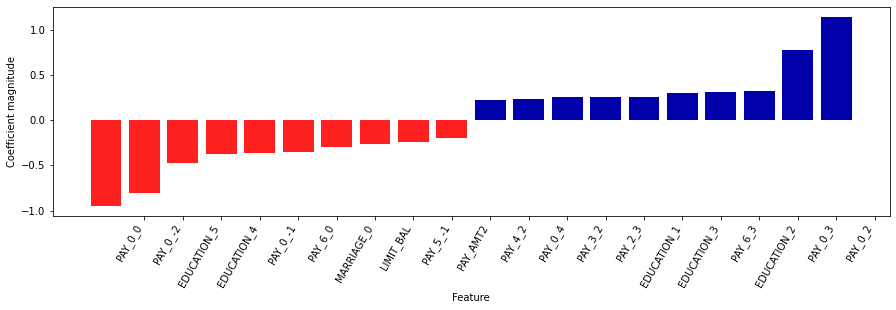

In [31]:
import mglearn
mglearn.tools.visualize_coefficients(coeffs, new_columns, n_top_features=10)

**The top 3 features with biggest coefficients: Pay_0_2, Pay_0_3, Education_2.**


**The bottom 3 features with smallest coefficients: Pay_0_0, Pay_0_2, Education_5**

**These features play the biggest factors in determining whether someone will default their payment or not. Pay_0_0 represents whether someone will pay their entire balance for that month on time. That makes sense since people who will pay their statement on time will not default their payment. Pay_0_2 represents whether someone will delay payment for two months. This suggests that people will most likely default their payment if they have delayed their payment for 2 months. Overall, the top and bottom features make sense on why they have their respective coefficients.**

<br><br>

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:5}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 

In [32]:

search.score(X_test, y_test)

0.5391891891891891

**The best performing model has a test score of 0.5391891891891891, which is slightly below the cross-validation score of 0.556741. I would not trust the results since the accuracy is low. The test score agrees with validation score since the test score is smaller. Since there is a small difference in accuracies, the model had no issues with optimization bias of the validation set.**

<br><br>

## (Optional) 13. Explaining predictions 
rubric={points:1}

**Your tasks**

1. Take one or two test predictions and explain them with SHAP force plots.  

<br><br>

## 14. Summary of results <a name="13"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Report your final test score along with the metric you used. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 

**1. Final test Score: 0.5391891891891891, F1 Score: 0.532150**

**2. My initial assumptions was that marriage and age would play a role in whether someone would default payment. However, the model seems to suggest otherwise. The final test score seems really low and I would not deploy this model in real life.**

**3. Ways to improve performance/interpretability:**
- Research and collect features that should play a role in whether payments would be defaulted
- Find the best hyper parameters for the all the models used and then compared F1 scores
- Try removing features that have small coefficients(magnitude wise)

<br><br><br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 